# CNN-2

Different method is being used train and test the results.

# Import Packages and Functions.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2 # import cv2

In [2]:
import os
print(os.listdir("C:/Users/karth/Desktop/project"))

['.ipynb_checkpoints', 'chest_xray', 'PD', 'pd.ipynb', 'Untitled.ipynb', 'Untitled1.ipynb']


In [3]:
DIR = os.listdir('C:/Users/karth/Desktop/project/chest_xray')
print(DIR)

['chest_xray', 'test', 'train', 'val', '__MACOSX']


In [4]:
train_folder = 'C:/Users/karth/Desktop/project/chest_xray/train'
test_folder = 'C:/Users/karth/Desktop/project/chest_xray/test'
val_folder = 'C:/Users/karth/Desktop/project/chest_xray/val'

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import random

In [6]:
labels = ["NORMAL", "PNEUMONIA"] # each folder has two sub folder name "PNEUMONIA", "NORMAL"
IMG_SIZE = 50 # resize image
data = []
def get_data_train(data_dir):
    for label in labels:
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                data.append([new_array, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [8]:
train = get_data_train(train_folder)
test = get_data_train(test_folder)
val = get_data_train(val_folder)

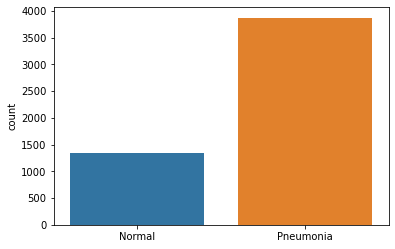

In [9]:
l = []
for i in train:
    if(i[1] == 0):
        l.append("Normal")
    else:
        l.append("Pneumonia")
        
sns.countplot(l)

In [10]:
X_train = []
y_train = []

X_val = []
y_val = []

X_test = []
y_test = []

for feature, label in train:
    X_train.append(feature)
    y_train.append(label)

for feature, label in test:
    X_test.append(feature)
    y_test.append(label)
    
for feature, label in val:
    X_val.append(feature)
    y_val.append(label)

In [11]:
X_train = np.array(X_train) / 255
X_val = np.array(X_val) / 255
X_test = np.array(X_test) / 255

In [12]:
X_test.shape

(5840, 50, 50)

In [13]:
X_train = X_train.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y_train = np.array(y_train)

X_val = X_val.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y_val = np.array(y_val)

X_test = X_test.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y_test = np.array(y_test)

In [14]:
X_test.shape

(5840, 50, 50, 1)

In [27]:
import tensorflow as tf
from tensorflow.keras.layers import Flatten, Conv2D, Activation, Dense, Dropout, MaxPooling2D
from tensorflow.keras.models import Sequential

# Builidng a CNN-2 Model

Traing the model with epoch 12 and saving the model as .h5 file.

In [28]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding="same", input_shape=X_train.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(128, activation="relu"))

model.add(Dense(1))
model.add(Activation("sigmoid"))

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=12, validation_data=(X_val, y_val), shuffle=True)
scores = model.evaluate(X_test, y_test)

model.save('model.h5')

Epoch 1/12
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
163/163 [==============================] - ETA: 0s - loss: 0.3509 - accuracy: 0.8505WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x000001C219919400> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and atta

In [29]:
# scores
print("Test loss is ===>  {} %".format(scores[0]*100))
print("Test accuracy is ===>  {} %".format(scores[1]*100))

Test loss is ===>  18.18680614233017 %
Test accuracy is ===>  95.70205211639404 %


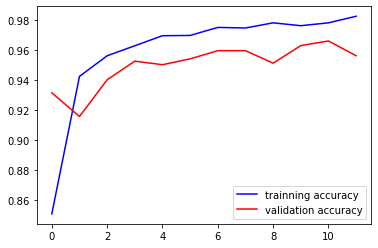

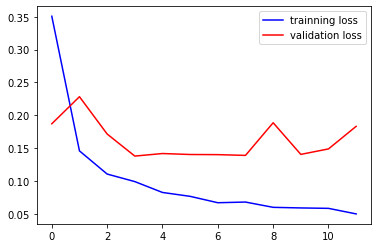

In [30]:
import matplotlib.pyplot as plt
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, "b", label="trainning accuracy")
plt.plot(epochs, val_accuracy, "r", label="validation accuracy")
plt.legend()
plt.show()

plt.plot(epochs, loss, "b", label="trainning loss")
plt.plot(epochs, val_loss, "r", label="validation loss")
plt.legend()
plt.show()

In [31]:
# predict classes

prediction = model.predict_classes(X_test)
prediction = prediction.reshape(1, -1)[0]
prediction[:15]

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [32]:

# correct and incorrect
# you can check tensorflow website

correct = np.nonzero(prediction == y_test)[0]
incorrect = np.nonzero(prediction != y_test)[0]

# Some correct visualization

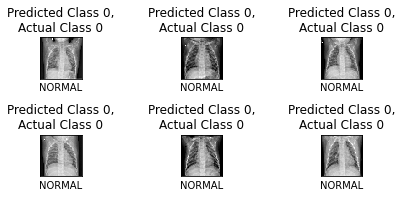

In [33]:
j = 0
for i in correct[:6]:
    plt.subplot(3,3,j+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_test[i].reshape(50,50), cmap="gray", interpolation='none')
    plt.title("Predicted Class {},\nActual Class {}".format(prediction[i], y_test[i]))
    plt.xlabel(labels[prediction[i]])
    plt.tight_layout()
    j += 1

# Some incorrect visualization

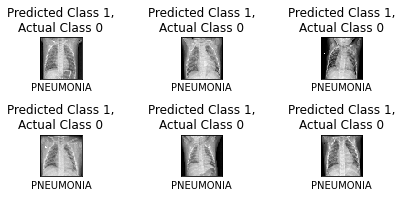

In [34]:
j = 0
for i in incorrect[:6]:
    plt.subplot(3,3,j+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_test[i].reshape(50,50), cmap="gray", interpolation='none')
    plt.title("Predicted Class {},\nActual Class {}".format(prediction[i], y_test[i]))
    plt.xlabel(labels[prediction[i]])
    plt.tight_layout()
    j += 1

# Load the saved model

Load the saved model file and predicting the output of some external photo

In [35]:
# load model and predict some some external photo
import tensorflow as tf
import cv2
from PIL import Image
import matplotlib.pyplot as plt
IMG_SIZE = 50
labels = ["NORMAL", "PNEUMONIA"]
def prepare(filepath):
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)

model = tf.keras.models.load_model("model.h5")

In [36]:
prediction = model.predict([prepare("C:/Users/karth/Desktop/aaa.jpg")])
print(labels[int(prediction[0])])

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
PNEUMONIA


In [38]:
prediction = model.predict([prepare("C:/Users/karth/Desktop/bbb.jpeg")])
print(labels[int(prediction[0])])

PNEUMONIA


In [39]:
prediction = model.predict([prepare("C:/Users/karth/Desktop/ccc.jpeg")])
print(labels[int(prediction[0])])

NORMAL
